In [13]:
#-------Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [14]:
num_classes = 10
img_size = (28, 28, 1)

In [15]:
#-------Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#-------Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#-------Reshape to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#-------One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [16]:
#-------Define the CNN model
inputs = Input(img_size)
x = Conv2D(filters=8, kernel_size=(3,3), activation='relu')(inputs)
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

In [17]:
model.summary(show_trainable = True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 28, 28, 1)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d (Conv2D)             │ (None, 26, 26, 8)     │         80 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_1 (Conv2D)           │ (None, 24, 24, 16)    │      1,168 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 9216)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 64)            │    589,888 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 16)            │      1,040 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_2 (Dense)             │ (None, 10)            │        170 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 592,346 (2.26 MB)

 Trainable params: 592,346 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1500/1500 - 9s - 6ms/step - accuracy: 0.9986 - loss: 0.0042 - val_accuracy: 0.9822 - val_loss: 0.1466
Epoch 2/100
1500/1500 - 9s - 6ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9840 - val_loss: 0.1228
Epoch 3/100
1500/1500 - 9s - 6ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9855 - val_loss: 0.1087
Epoch 4/100
1500/1500 - 9s - 6ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9848 - val_loss: 0.1185
Epoch 5/100
1500/1500 - 9s - 6ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9840 - val_loss: 0.1221
Epoch 6/100
1500/1500 - 8s - 6ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9847 - val_loss: 0.1193
Epoch 7/100
1500/1500 - 8s - 6ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9858 - val_loss: 0.1144
Epoch 8/100
1500/1500 - 9s - 6ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9852 - val_loss: 0.1321
Epoch 9/100
1500/1500 - 9s - 6ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 

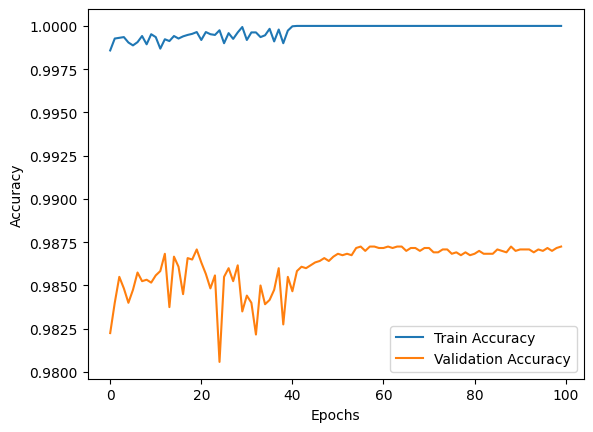

In [19]:
#-------Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#-------Train the model
history = model.fit(
    x_train, y_train,
    epochs=100,            
    batch_size=32,
    validation_split=0.2,
    verbose=2
)
#-------Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

#-------Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()